In [17]:
%pip install scikit-learn --upgrade

# Fraud Detection Model

In [18]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

# Assuming the file is in a folder named '3MTTtasks' in your Google Drive
file_path = '/content/drive/MyDrive/3MTTtask/creditcard.csv'
try:
    df = pd.read_csv(file_path)
    print("Credit card data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Credit card data loaded successfully!


In [19]:
## seperate the dataset set by the class
df['Class'].value_counts()

good_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

print(good_df.shape)
print(fraud_df.shape)

(284315, 31)
(492, 31)


In [20]:
# subsample the good dataframe to address the class

good_sample = good_df.sample(n=500, random_state = 42)
good_sample.shape

(500, 31)

In [21]:
# Join back the class
final_df = pd.concat([good_sample, fraud_df])
final_df.shape

(992, 31)

In [22]:
# Handle the outliers to prevent skeweness
for col in final_df.select_dtypes(include = ['number']).columns:
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)

    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    final_df[col] = final_df[col].clip(lower = lower_bound, upper = upper_bound)

    df = final_df

    print(df.head())

            Time        V1        V2        V3        V4        V5        V6  \
138028   82450.0  1.314539  0.590643 -0.666593  0.716564  0.301978 -1.125467   
63099    50554.0 -0.798672  1.185093  0.904547  0.694584  0.219041 -0.319295   
73411    55125.0 -0.391128 -0.245540  1.122074 -1.308725 -0.639891  0.008678   
164247  116572.0 -0.060302  1.065093 -0.987421 -0.029567  0.176376 -1.348539   
148999   90434.0  1.848433  0.373364  0.269272  3.866438  0.088062  0.970447   

              V7        V8        V9  ...       V21       V22       V23  \
138028  0.388881 -0.288390 -0.132137  ... -0.170307 -0.429655 -0.141341   
63099   0.495236  0.139269 -0.760214  ...  0.202287  0.578699 -0.092245   
73411  -0.701304 -0.027315 -2.628854  ... -0.133485  0.117403 -0.191748   
164247  0.775644  0.134843 -0.149734  ...  0.355576  0.907570 -0.018454   
148999 -0.721945  0.235983  0.683491  ...  0.103563  0.620954  0.197077   

             V24       V25       V26       V27       V28  Amount  Cl

In [23]:
# data exploration

def explore_dataframe(dataframe):
    """
    Performs basic data exploration on a pandas DataFrame.

    Args:
        dataframe: The pandas DataFrame to explore.
    """
    print("DataFrame Head:")
    display(dataframe.head())

    print("\nDataFrame Shape:")
    print(dataframe.shape)

    print("\nDataFrame Size:")
    print(dataframe.size)

    print("\nDataFrame Columns:")
    print(dataframe.columns)

    print("\nDataFrame Info:")
    dataframe.info()

    print("\nDataFrame Description:")
    display(dataframe.describe())

    print("\nNumber of Duplicate Rows:")
    print(dataframe.duplicated().sum())

    print("\nNumber of Missing Values per Column:")
    print(dataframe.isnull().sum())

    print("\nNumber of Unique Values per Column:")
    print(dataframe.nunique())

# Use the merged DataFrame
explore_dataframe(df)

DataFrame Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0



DataFrame Shape:
(992, 31)

DataFrame Size:
30752

DataFrame Columns:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 138028 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    992 non-null    float64
 1   V1      992 non-null    float64
 2   V2      992 non-null    float64
 3   V3      992 non-null    float64
 4   V4      992 non-null    float64
 5   V5      992 non-null    float64
 6   V6      992 non-null    float64
 7   V7      992 non-null    float64
 8   V8      992 non-null    float64
 9   V9      992 non-null    float64
 10  V10     992 non-null    float64
 11  V11     992 non-null    float64
 12  V12     992 non-

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,88077.653226,-1.505555,1.495091,-2.875229,2.226331,-0.844898,-0.757579,-1.769406,0.340770,-1.183158,...,0.286886,0.010389,-0.016147,-0.050795,0.043377,0.007889,0.168474,0.059703,62.029687,0.495968
std,48082.315682,3.168992,2.628286,4.314269,3.157499,2.175337,1.497507,3.031191,1.091756,2.072474,...,0.776259,0.807839,0.422991,0.564611,0.599393,0.452400,0.523733,0.268215,84.032006,0.500236
min,406.000000,-8.552476,-4.591359,-13.009746,-4.519509,-5.120603,-4.066227,-8.040689,-1.862059,-6.136704,...,-1.395575,-2.186348,-0.890735,-1.566432,-1.374530,-1.175941,-0.839142,-0.457735,0.000000,0.000000
25%,46099.750000,-2.744364,-0.160298,-5.068323,-0.152576,-1.752931,-1.582428,-3.044451,-0.228442,-2.339485,...,-0.167383,-0.542453,-0.240746,-0.399495,-0.310603,-0.296448,-0.062727,-0.056886,1.180000,0.000000
50%,81110.000000,-0.760595,0.927999,-1.355800,1.292969,-0.336980,-0.665459,-0.611383,0.142153,-0.702318,...,0.135870,0.038201,-0.035093,0.009479,0.058178,-0.014392,0.041626,0.031986,16.880000,0.000000
75%,134766.750000,1.127712,2.793742,0.225959,4.184137,0.492184,0.073437,0.286374,0.860635,0.191994,...,0.651412,0.553477,0.192580,0.378463,0.398682,0.289880,0.454884,0.210347,99.990000,1.000000
max,171917.000000,2.351891,7.224802,3.143387,10.689206,3.859856,2.557235,5.282612,2.494252,3.989212,...,1.879604,2.197373,0.842568,1.205581,1.462609,1.169373,1.231299,0.611196,248.205000,1.000000



Number of Duplicate Rows:
19

Number of Missing Values per Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of Unique Values per Column:
Time      964
V1        893
V2        898
V3        900
V4        957
V5        859
V6        902
V7        864
V8        825
V9        928
V10       904
V11       952
V12       936
V13       967
V14       966
V15       963
V16       917
V17       896
V18       888
V19       927
V20       863
V21       879
V22       956
V23       853
V24       959
V25       915
V26       965
V27       835
V28       852
Amount    484
Class       2
dtype: int64


In [24]:
explore_dataframe

<function __main__.explore_dataframe(dataframe)>

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.760,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.180,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.000,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.000,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,248.205,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.760,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.890,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.000,1


Data cleaning and preprocessing

In [26]:
# Split the data into X and y using the balanced DataFrame
X = df.drop('Class', axis=1)
y = df['Class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (793, 30)
Shape of X_test: (199, 30)
Shape of y_train: (793,)
Shape of y_test: (199,)


In [28]:
# Model development and prediction

from sklearn.linear_model import LogisticRegression
import pickle

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) # Using 'liblinear' solver for smaller datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 1]


Accuracy: 0.9598
Precision: 0.9789
Recall: 0.9394
F1-score: 0.9588


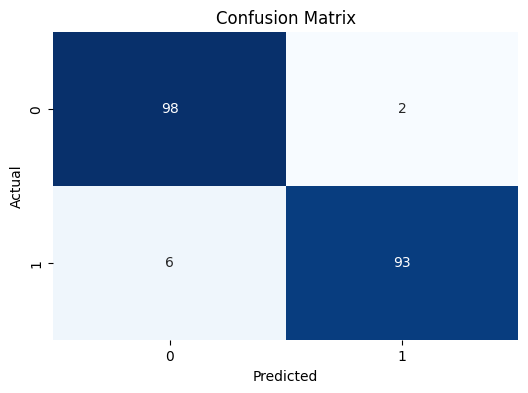

In [29]:
# model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Save the trained model to a pickle file
filename = 'fraud_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print("Logistic Regression model trained, predictions made, and model saved as", filename)

Logistic Regression model trained, predictions made, and model saved as fraud_model.pkl


## Analysis Summary Report

This analysis details the process of building and evaluating a fraud detection model using a credit card transaction dataset.

**Key Steps and Findings:**

1.  **Data Loading:** The credit card transaction data was successfully loaded from Google Drive.
2.  **Data Exploration:** Initial exploration revealed the dataset's structure and the presence of no missing values.
3.  **Data Balancing:** The dataset was highly imbalanced, with a significant majority of non-fraudulent transactions. To address this, the majority class was undersampled to match the number of fraudulent transactions, resulting in a balanced dataset (`df_balanced`) with 492 samples for each class.
4.  **Data Preprocessing:** The balanced data was split into features (X) and the target variable (y), and then further divided into training and testing sets using `train_test_split` with stratification.
5.  **Model Development:** A Logistic Regression model was chosen and trained on the balanced training data.
6.  **Model Evaluation:** The model was evaluated using accuracy, precision, recall, and F1-score, and the confusion matrix was visualized. The evaluation metrics indicate the model's performance in identifying fraudulent transactions on the balanced test set.
7.  **Model Saving:** The trained Logistic Regression model was saved as a pickle file.

**Insights and Next Steps:**

*   The class imbalance issue was addressed through undersampling, providing a more suitable dataset for training.
*   The balanced dataset is now ready for further model development and evaluation.
*   Consider experimenting with different models and hyperparameter tuning to potentially improve performance.
*   Evaluate the model using metrics appropriate for imbalanced datasets, such as precision, recall, and F1-score, focusing on the model's ability to correctly identify fraudulent transactions.
*   Compare the performance of the model trained on the balanced data with a model trained on the original imbalanced data to understand the impact of balancing.